# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


## Group Number : 42

## Student 1 
### Name : Otte van Dam
### ID : 5096790

## Student 2
### Name : Suhaib Basir
### ID : 5059151

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [18]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

nb = nbformat.read("Lab2.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 493


## 1. Familiarization task – 1 A4

In [44]:
data = "train_data.csv"
df1 = pd.read_csv(data)
original_data = df1
df1 = df1.drop(['Id'], axis=1)

          data types  unique values
Timestamp     object         496800
FIT101       float64           2778
LIT101       float64          10322
MV101          int64              3
P101           int64              2
P102           int64              1
AIT201       float64            549
AIT202       float64           1695
AIT203       float64           5696
FIT201       float64           2879
MV201          int64              3
P201           int64              1
P202           int64              1
P203           int64              2
P204           int64              1
P205           int64              2
P206           int64              1
DPIT301      float64           4854
FIT301       float64           6224
LIT301       float64           9880
MV301          int64              3
MV302          int64              3
MV303          int64              3
MV304          int64              3
P301           int64              2
P302           int64              2
AIT401       float64        

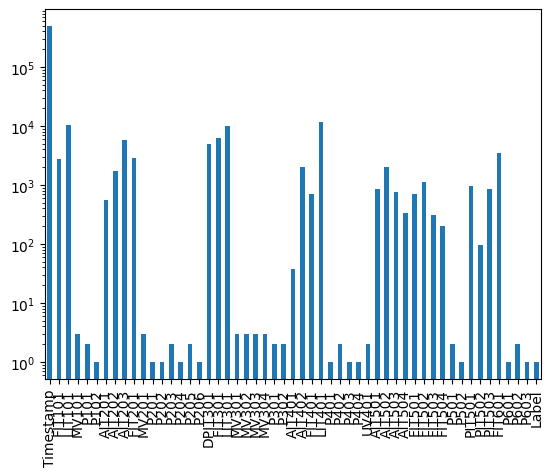

In [20]:
unique_values = df1.nunique()
unique_values.name = 'unique values'

data_types = df1.dtypes
data_types.name = 'data types'

print(pd.merge(data_types, unique_values, left_index=True, right_index=True))

ax = unique_values.plot.bar()
ax.set_yscale('log')

plt.show()

### 1a. Plot visualizations 

/var/folders/f5/pgcxx91x31l672vfgh983wcr0000gn/T/ipykernel_85125/958330701.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1_heat_map.corr(), cmap='coolwarm', ax=ax1)


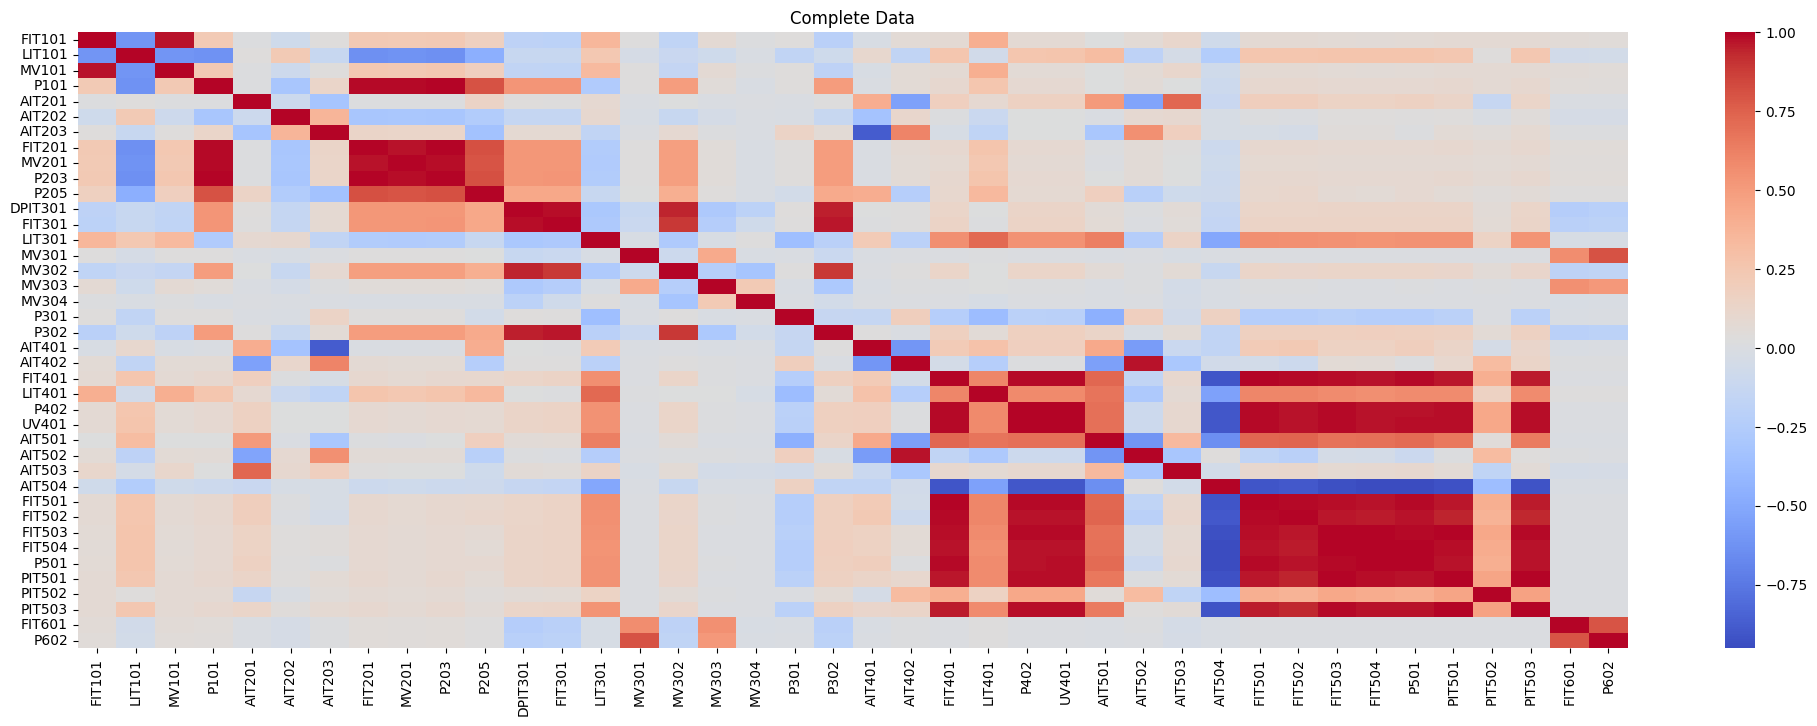

In [21]:
f, (ax1) = plt.subplots(1,figsize =(25, 8))
single_value = []
# Store all the columns with only one unique value since they have no correlation
for i in range(len(df1.nunique())):
    if unique_values[i] == 1:
        single_value.append(i)

df1_heat_map = df1.drop(df1.columns[single_value], axis=1)
sns.heatmap(df1_heat_map.corr(), cmap='coolwarm', ax=ax1)
ax1.set_title('Complete Data')
plt.show()

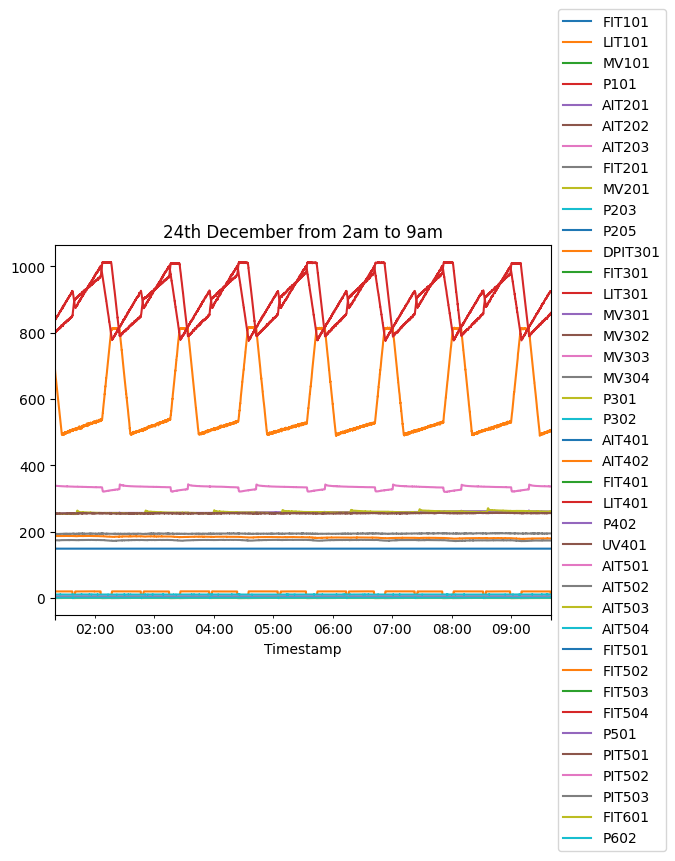

In [56]:
# Assuming your dataframe is called df and has a column named 'timestamp'
# You can use the pd.to_datetime function to convert the timestamp column to datetime objects
df1_first_part = df1[120000:150000].drop(df1.columns[single_value], axis=1)
df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])

# You can use the df.set_index method to set the timestamp column as the index of the dataframe
df1_timestamp_indexed = df1_first_part.set_index('Timestamp')
# You can use the df.plot method to plot the dataframe with all the columns on the y-axis
df1_timestamp_indexed.plot()
plt.title('All data - 24th December from 2am to 9am')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

##### Cyclic signals

/var/folders/f5/pgcxx91x31l672vfgh983wcr0000gn/T/ipykernel_85125/3078970927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])


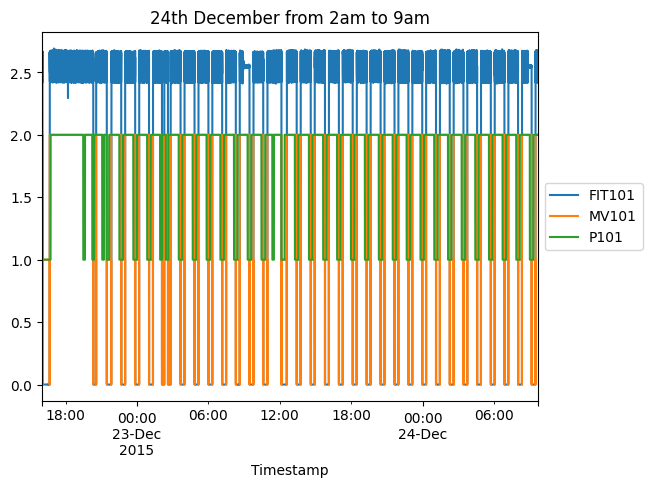

In [63]:
# Assuming your dataframe is called df and has a column named 'timestamp'
# You can use the pd.to_datetime function to convert the timestamp column to datetime objects
df1_first_part = df1[0:150000]
df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])

# You can use the df.set_index method to set the timestamp column as the index of the dataframe
df1_timestamp_indexed = df1_first_part.set_index('Timestamp')
# You can use the df.plot method to plot the dataframe with all the columns on the y-axis
# df1_timestamp_indexed["LIT401"].plot()
df1_timestamp_indexed["FIT101"].plot()
df1_timestamp_indexed["MV101"].plot()
df1_timestamp_indexed["P101"].plot()

plt.title('24th December from 2am to 9am')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

##### Signals with non-constant cyclic behaviour - Oscillations with varying frequency

/var/folders/f5/pgcxx91x31l672vfgh983wcr0000gn/T/ipykernel_85125/35870041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])


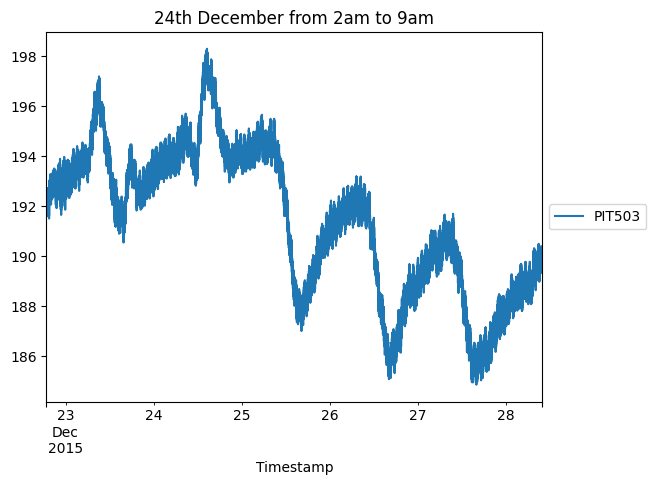

In [81]:
# Assuming your dataframe is called df and has a column named 'timestamp'
# You can use the pd.to_datetime function to convert the timestamp column to datetime objects
df1_first_part = df1[10000:]
df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])

# You can use the df.set_index method to set the timestamp column as the index of the dataframe
df1_timestamp_indexed = df1_first_part.set_index('Timestamp')
# You can use the df.plot method to plot the dataframe with all the columns on the y-axis
# df1_timestamp_indexed["LIT401"].plot()
df1_timestamp_indexed["PIT503"].plot()
plt.title('24th December from 2am to 9am')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

##### Random behaviour - blue
##### Generally trending downwards - orange

/var/folders/f5/pgcxx91x31l672vfgh983wcr0000gn/T/ipykernel_85125/644953893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])


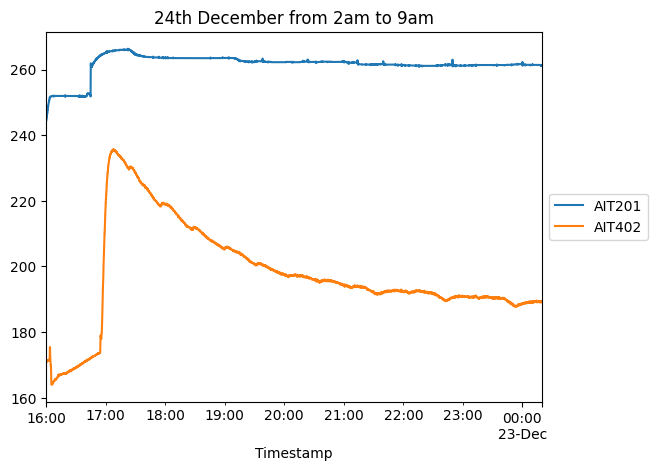

In [82]:
# Assuming your dataframe is called df and has a column named 'timestamp'
# You can use the pd.to_datetime function to convert the timestamp column to datetime objects
df1_first_part = df1[0:30000]
df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])

# You can use the df.set_index method to set the timestamp column as the index of the dataframe
df1_timestamp_indexed = df1_first_part.set_index('Timestamp')
# You can use the df.plot method to plot the dataframe with all the columns on the y-axis
df1_timestamp_indexed["AIT201"].plot()
# df1_timestamp_indexed["P201"].plot()
# df1_timestamp_indexed["DPIT301"].plot()
df1_timestamp_indexed["AIT402"].plot()
plt.title('24th December from 2am to 9am')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### 1b. Answers to the three questions

#### What types of signals are there?

#### Are the signals correlated? Do they show cyclic behavior?
From the correlation matrix above, we can visualise which signals correlate with each other. From an intial inspection of the heatmap, we can see that most of the values have a correlation value of 0, however, the signals which are correlated with others have a very high correlation value. For example FIT401 almost has a correlation value of 1 with the signals from FIT501 - PIT503. 

Furthermore, in the second graph we have plotted some of the relevant signals on a randomly chosen data and timeframe (24th December 2am to 9am). Within this time frame we can see that a lot of the signals follow a cyclic pattern. For example, the red and the orange data lines shown above, follow a cycle of around 70 min. 

## 2. LOF task – 1/2 A4 – Individual

### 2a. Plot LOF scores

### 2b. Analysis and answers to the questions

## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

### 3b. Analysis and answers to the questions

## 4. ARMA task – 1/2 A4 - Individual

### 4a. Print relevant plots and/or metrics to determine the parameters.

### 4b. Plots to study the detected anomalies

### 4c. Analysis and answers to the questions

## 5. N-gram task – 1/2 A4 - Individual

### 5a. Visualise discretization

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.